In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

### Hypothesis about the mean

* H0: the mean annual compensation of the population of data scientists is $110,000
* HA: the mean annual compensation of the population of data scientists is higher than $110,000
* Alpha = 0.05

### Read data

In [2]:
df = pd.read_feather(r"..\data\stack_overflow.feather")  
df.head(3)

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30


In [3]:
mean_comp_hyp = 110000
alpha = 0.05

In [4]:
# The point estimate (sample statistic)
mean_comp_samp = df["converted_comp"].mean()
print("The mean annual compensation is:{:.2f}$".format(mean_comp_samp))

The mean annual compensation is:119574.72$


### Generating a bootstrap distribution

In [5]:
so_boot_dist = []
for i in range(5000):
    so_boot_dist.append(
        np.mean(df.sample(frac=1, replace=True)["converted_comp"]
                )
    )

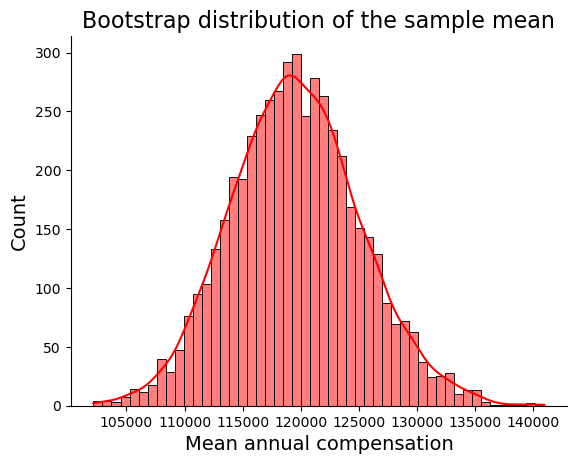

In [6]:
# Visualising the bootstrap distribution
g = sns.histplot(so_boot_dist, bins=50,  kde = True, color = "red", alpha = 0.5)
sns.despine(right=True, top=True)
g.set_xlabel("Mean annual compensation", fontsize=14)
g.set_ylabel("Count", fontsize=14)
g.set_title("Bootstrap distribution of the sample mean", fontsize=16)
plt.show()

In [7]:
# Standrard error of the mean
std_error = np.std(so_boot_dist, ddof=1)
print("The standard error of the mean annual compensation is:{:.2f}$".format(std_error))

The standard error of the mean annual compensation is:5547.16$


<img src="..\data\z_score.jpg" width="500" height="200">

In [8]:
z_score = (mean_comp_samp - mean_comp_hyp) / std_error
print("The z-score is:{}".format(z_score))

The z-score is:1.726057143183375


### Calculating p-value from the z-score

In [9]:
# Calculate the p-value for the z-score, using a right-tailed test.
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
                 
# Print the p-value
print("The p-value is:{:.2f}".format(p_value))

if p_value <= alpha:
    print("Reject H0 in favour of HA")
else:
    print("Failed to reject H0")

The p-value is:0.04
Reject H0 in favour of HA


### Confidence interval

For significance level of alpha, it's common to choose a confidence interval of 1-alpha.

* alpha = 0.05 -> 95% confidence interval

In [10]:
lower = np.quantile(so_boot_dist, 0.025)
upper = np.quantile(so_boot_dist, 0.975)
print((lower, upper))

(109026.07642636001, 130786.73337019017)


### Conclusion

Because the p-value (0.04) < alpha (0.05), we reject H0 in favour of HA. However, the confidence interval does not match up with the conclusion to reject H0 becuase 110,000 is included in the 95% confidence interval. If we reject H0, we are committing a _false positive (Type I) error_.